In [1]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram
%matplotlib inline

### QASM backends
This notebook, again, builds off the GHZ_state notebook. 
Make sure to read that one first.

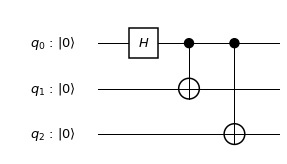

In [2]:
# create a quantum register of 3 qubits:
q = QuantumRegister(3,'q')

# initialize the quantum circuit:
qcirc = QuantumCircuit(q)

qcirc.h(q[0]) # apply the Hadamard gate (H-gate) to q[0], this puts the qubit into super position
qcirc.cx(q[0],q[1]) # (Bell state) apply the pauli-x (cNOT gate) to q0 (contol) and q1 (target)
qcirc.cx(q[0],q[2]) # (GHZ state) apply the pauli-x (cNOT gate) to q0 (control) and q2(target)

qcirc.draw(output = 'mpl')

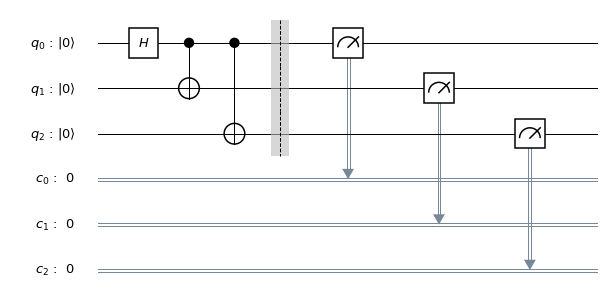

In [3]:
# create classical registers to store the measurements from the qubits
c = ClassicalRegister(3,'c')
meas_qc = QuantumCircuit(q,c)
meas_qc.barrier (q) # draw a barrier after q for clarity
meas_qc.measure(q,c) # add measurements and map the qubits to classical bits

# combine circuits and draw:
qc = qcirc+meas_qc
qc.draw(output = 'mpl')

## QASM Backend simulator

In [4]:
# get the backend
backend_simulator = BasicAer.get_backend('qasm_simulator')

# we need to execute the circuit now 
# NOTE: shots is the number of times the circuit simulation will repeat 
simulation_job = execute(qc,backend_simulator,shots = 1024)
print(simulation_job.status())

JobStatus.DONE


In [5]:
simulation_results = simulation_job.result()
result_count = simulation_results.get_counts(qc)
# get_counts returns a list of the number each result was measured.
# the result should be ABOUT 50% |000> and 50 |111>
print(result_count)

{'000': 502, '111': 522}


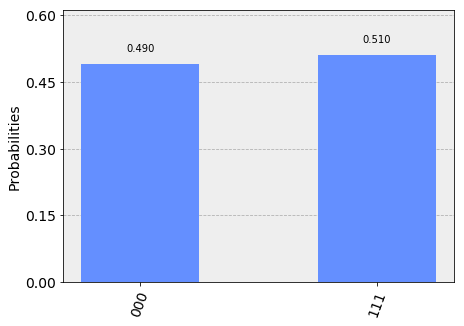

In [6]:
plot_histogram(result_count) # plot the results to see the PERCENTAGE